# Credit Screening


## Dataset Description

Type here.


## Random Forest and Decision Trees

Random forest is an effective method for solving such classification problems. The algorithm works by collecting "votes" from multiple decision trees built on random sampling of the original dataset.

Single decision trees are built through a partitioning and pruning process. In the partitioning phase, samples are plotted in feature space and divided until each division holds a single class. Each split corresponds to a node in the decision tree. Since the resulting tree can contain divisions that do not accurately represent the structure of the data, the next step is to prune the tree to prevent overfitting. The pruning step optimizes between classification error and the number of nodes to select the smallest tree with an error value within a standard deviation from the minimum error tree. The final result is a tree with nodes that divide samples, and leaves that show resulting class distributions.

Random forest work for such datasets because of their versatility and accuracy. The algorithm is suited for a variety of data types, including categorical, discrete, and continuous data. It is also robust to outliers due to the fact that is searches for underlying data structure as opposed to magnitudes. Resulting predictions tend to have high accuracy because random forest combines the outcomes from multiple learning models. This is not to say that the algorithm does not have its own biases. While it is possible to use random forest for feature ranking, it can lead to issues when dealing with correlated features. In a set of correlated features, the algorithm can choose a single variable and reduce the importance of correlated variables. This makes it important to have an understanding of how the various features relate to one another.


## Citation Information

Cite here.

In [9]:
# Import modules
import urllib
import numpy as np
import pandas as pd
from StringIO import StringIO
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt

### Gathering Data

Download data from UCI repo. Dataset is small (31K) and can be loaded into memory.

In [2]:
# Download and format data
urllib.URLopener().retrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', 'credit_data.data')
data_file = open('credit_data.data', 'r').read()
df_all = pd.read_table(StringIO(data_file), sep=',', header=None)
df_all.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+


There are 15 attributes and a class column. The columns will be renamed to reflect this fact.

In [3]:
# Rename columns
attribute_numls = range(1, 16)
columnsls = ['A' + str(x) for x in attribute_numls] + ['Class']
df_all.columns = columnsls
print('Number of entries: ' + str(df_all.shape[0]))
df_all.head(3)

Number of entries: 690


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+


There are 690 samples in the dataset. 


### Variable Study

It is important to have an idea of what the variables look like in order to determine which ML algorithms can be applied to the dataset, prepare the data for modeling, and get an idea of what biases can influence the final results. 

Based on the frame subset shown above, there is a mix of categorical and continuous variables. While categorical variables can be split into nominal and orderinal attributes, the anonymity makes it difficult to further split the categorical attributes. Categorical variables include A1, A4, A5, A6, A7, A9, A10, A12, and A13. Continuous variables may include A2, A3, A8, A11, A14, and A15, although A11, A14, and A15 may also be categorical. 


#### Data Types

The first check will be to search for data types. There should be a mixture of strings, floats, objects, and possibly integers.

In [4]:
# Check data types
df_all.dtypes

A1        object
A2        object
A3       float64
A4        object
A5        object
A6        object
A7        object
A8       float64
A9        object
A10       object
A11        int64
A12       object
A13       object
A14       object
A15        int64
Class     object
dtype: object

There are objects for columns that should show floats or strings/integers. This may be due to missing values. After missing values are found and accounted for, data types will be checked again.


#### Missing Values

In this dataset, missing values have been padded with a question mark. To make is simple to search for missing data, question marks will be converted to nulls.

In [5]:
# Look for missing data
df_all_null = df_all.replace('?', np.nan)
df_null_sum = df_all_null.isnull().sum()
df_null_sum[df_null_sum != 0]

/Library/Python/2.7/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


A1     12
A2     12
A4      6
A5      6
A6      9
A7      9
A14    13
dtype: int64

Seven columns contain missing values, but none of the class labels are missing. Samples with missing variable data can be dropped from the dataset, or missing values can be substituted in some way. While removing entries with missing values leads to a less manipulated dataset, it also decreases the size of the frame. Considering how there are only 690 samples, and frame is not missing a huge number of values, it makes sense to substitute missing values. The seven attributes with missing values will be studied to see how missing values should be replaced.

Variables that potentially belong to categorical features will be assessed below by showing frequency counts.

In [28]:
# Function to return sorted list of frequencies
def missing_categorical_counts(data):
    
    # Apply counter and return sorted values
    counted = Counter(data).items()
    sorted_countls = sorted(counted, key = lambda x: x[1])[::-1]
    
    return sorted_countls

null_catls = ['A' + str(x) for x in [1] + range(4, 8) + [14]]
null_cat_outputls = []
for curr_cat in null_catls:
    curr_cat_output = missing_categorical_counts(list(df_all_null[curr_cat]))
    null_cat_outputls.append(curr_cat_output)

# Report frequency counts
df_missing_cat = pd.DataFrame(zip(null_catls, null_cat_outputls), columns=['Factor', 'Counts'])
df_missing_cat

,Factor,Counts
0,A1,"[(b, 468), (a, 210), (nan, 12)]"
1,A4,"[(u, 519), (y, 163), (nan, 6), (l, 2)]"
2,A5,"[(g, 519), (p, 163), (nan, 6), (gg, 2)]"
3,A6,"[(c, 137), (q, 78), (w, 64), (i, 59), (aa, 54)..."
4,A7,"[(v, 399), (h, 138), (bb, 59), (ff, 57), (nan,..."
5,A14,"[(00000, 132), (00120, 35), (00200, 35), (0016..."


A14 does appear to be a 

#### Statistical Summaries

Scatter matrices will be generated for both classes to get a sense of how the data is distributed. To simplify processing downstream, classes will be changed to binary values.

In [6]:
# Change class column
df_all_null.loc[:,'Class_Binary'] = pd.Series(np.where(df_all_null['Class'] == '+', 1, 0))
df_0 = df_all_null[df_all_null['Class_Binary'] == 0].reset_index(drop=True)
df_1 = df_all_null[df_all_null['Class_Binary'] == 1].reset_index(drop=True)
print('Number of negative entries: ' + str(df_0.shape[0]))
print('Number of positive entries: ' + str(df_1.shape[0]))

Number of negative entries: 383
Number of positive entries: 307


There are more negative than positive entries. Matrices for rejected entries will be shown below.

Scatter Matrix (Rejected)


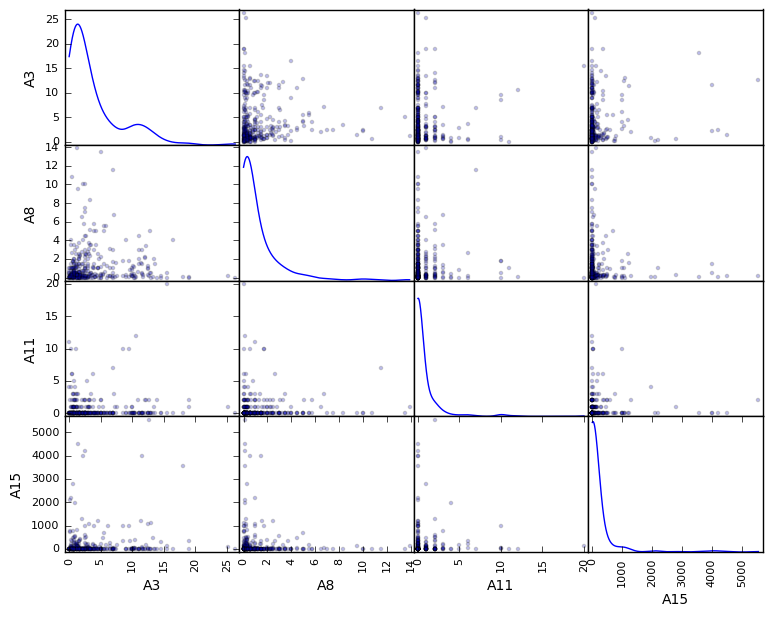

In [8]:
# Matrix for rejected samples
print('Scatter Matrix (Rejected)')
df_0_rm = df_0.dropna().reset_index(drop=True)
pd.tools.plotting.scatter_matrix(df_0_rm.ix[:,0:-2], figsize=(9, 7), alpha=0.2, diagonal='kde')
plt.show()
plt.close()

In [81]:
df_0.head(3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class,Class_Binary
0,b,32.33,7.5,u,g,e,bb,1.585,t,f,0,t,s,00420,0,-,0
1,b,34.83,4.0,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-,0
2,a,38.58,5.0,u,g,cc,v,13.500,t,f,0,t,g,00980,0,-,0


In [86]:
test = df_0.head(3)
test.ix[:,0:-2]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,32.33,7.5,u,g,e,bb,1.585,t,f,0,t,s,00420,0
1,b,34.83,4.0,u,g,d,bb,12.500,t,f,0,t,g,NaN,0
2,a,38.58,5.0,u,g,cc,v,13.500,t,f,0,t,g,00980,0


Describe data

Data types: continuous, categorical, discrete

Scatter matrix (no occupancy)


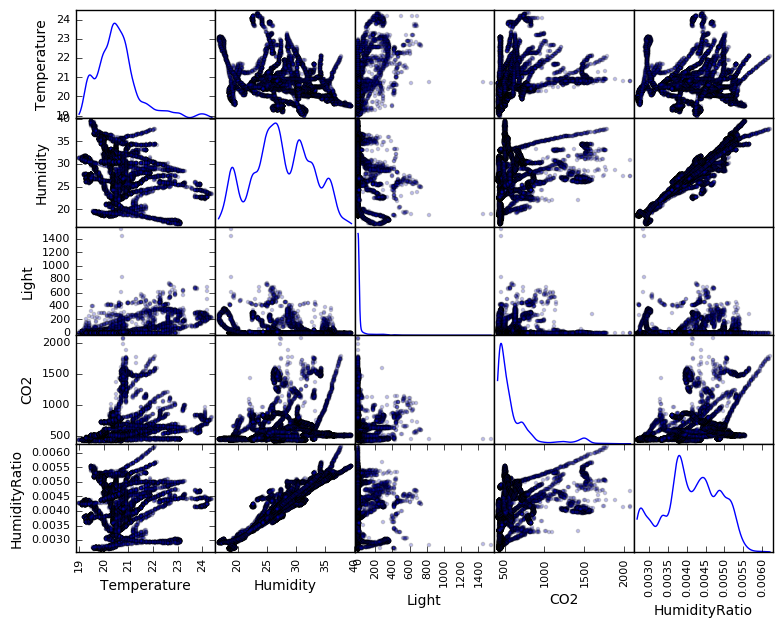

In [21]:
# Biplots for no occupancy
df_0 = df_all[df_all['Occupancy'] == 0].reset_index(drop=True)
print('Scatter matrix (no occupancy)')
pd.tools.plotting.scatter_matrix(df_0[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']], figsize=(9, 7), alpha=0.2, diagonal='kde')
plt.show()
plt.close()

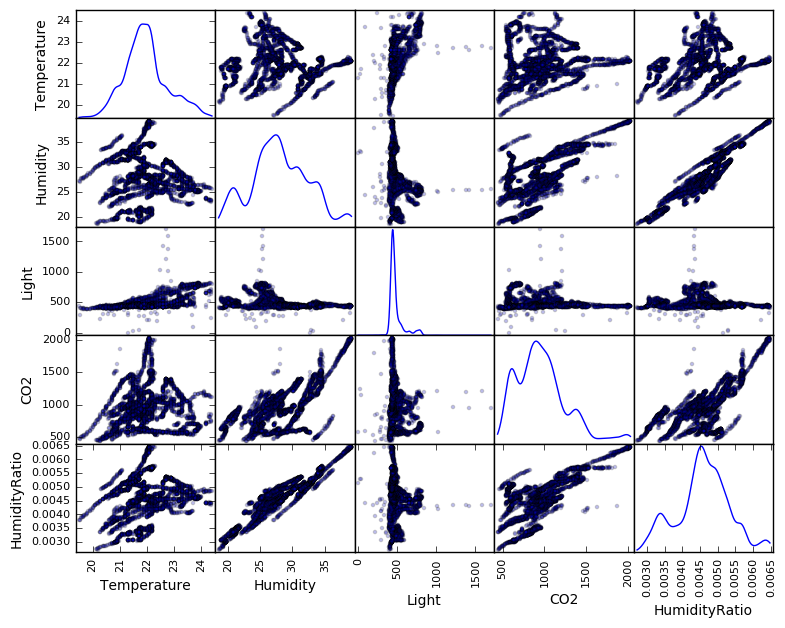

In [22]:
# Biplots for occupancy
df_1 = df_all[df_all['Occupancy'] == 1].reset_index(drop=True)
pd.tools.plotting.scatter_matrix(df_1[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']], figsize=(9, 7), alpha=0.2, diagonal='kde')
plt.show()
plt.close()

Write about correlated features and how that can affect feature importance rankings for random forest (can substitute one correlated feature for another, decrease importance of the "other" feature)


### Random Forest

In [50]:
# Separate features and target
features = df_train.columns[1:-2]
target = np.asarray(df_train['Occupancy'])

# Set random seed
np.random.seed(0)

# Create a classifier and feed training data
clf = RandomForestClassifier(n_jobs=100, criterion='gini', random_state=0)
clf.fit(df_train[features], target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=100,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [51]:
# Predict outcomes in test data
test_outcomes = clf.predict(df_test[features])

In [52]:
df_test.loc[:,'predictions'] = pd.Series(test_outcomes)
df_test.head(3)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,date_dt,predictions
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,2015-02-04 17:51:00,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,2015-02-04 17:51:59,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,2015-02-04 17:53:00,1


In [53]:
# Divide into fractions
df_right = df_test[df_test['Occupancy'] == df_test['predictions']]
df_wrong = df_test[df_test['Occupancy'] != df_test['predictions']]
print(df_right.shape[0], df_wrong.shape[0])

(4420, 330)


View feature importance

In [54]:
df_rank_features = pd.DataFrame(list(zip(df_train[features], clf.feature_importances_)), columns=['feature', 'weight'])
df_rank_features.sort_values('weight', ascending=False)

,feature,weight
2,Light,0.623226
3,CO2,0.191331
0,Temperature,0.139003
4,HumidityRatio,0.030350
1,Humidity,0.016090
